# Exercise 1:Analysis of Gasoline Prices

Name:Niharika Kumari

In [8]:
import pandas as pd
import numpy as np

# import bokeh 
from bokeh.plotting import figure, show, Figure
from bokeh.models import ColumnDataSource, Label
from bokeh.models.glyphs import Text
from bokeh.palettes import Spectral3
from bokeh.layouts import row, column, gridplot
import seaborn as sns
import matplotlib.pylab as plt

# tell bokeh to show the figures in the notebook
from bokeh.io import output_notebook
output_notebook()

import pandas as pd
import missingno as msno





Loading BokehJS ...

We need to clean the station data as there are data missing

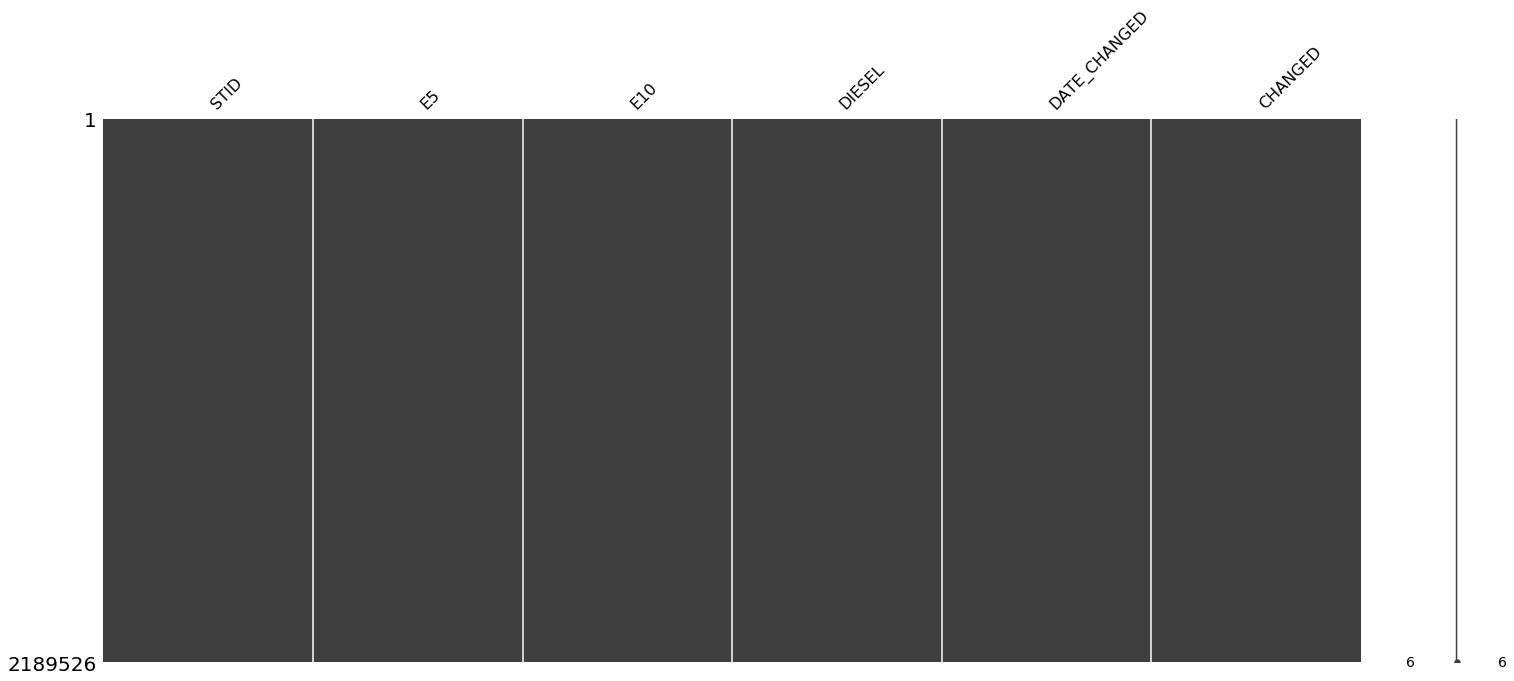

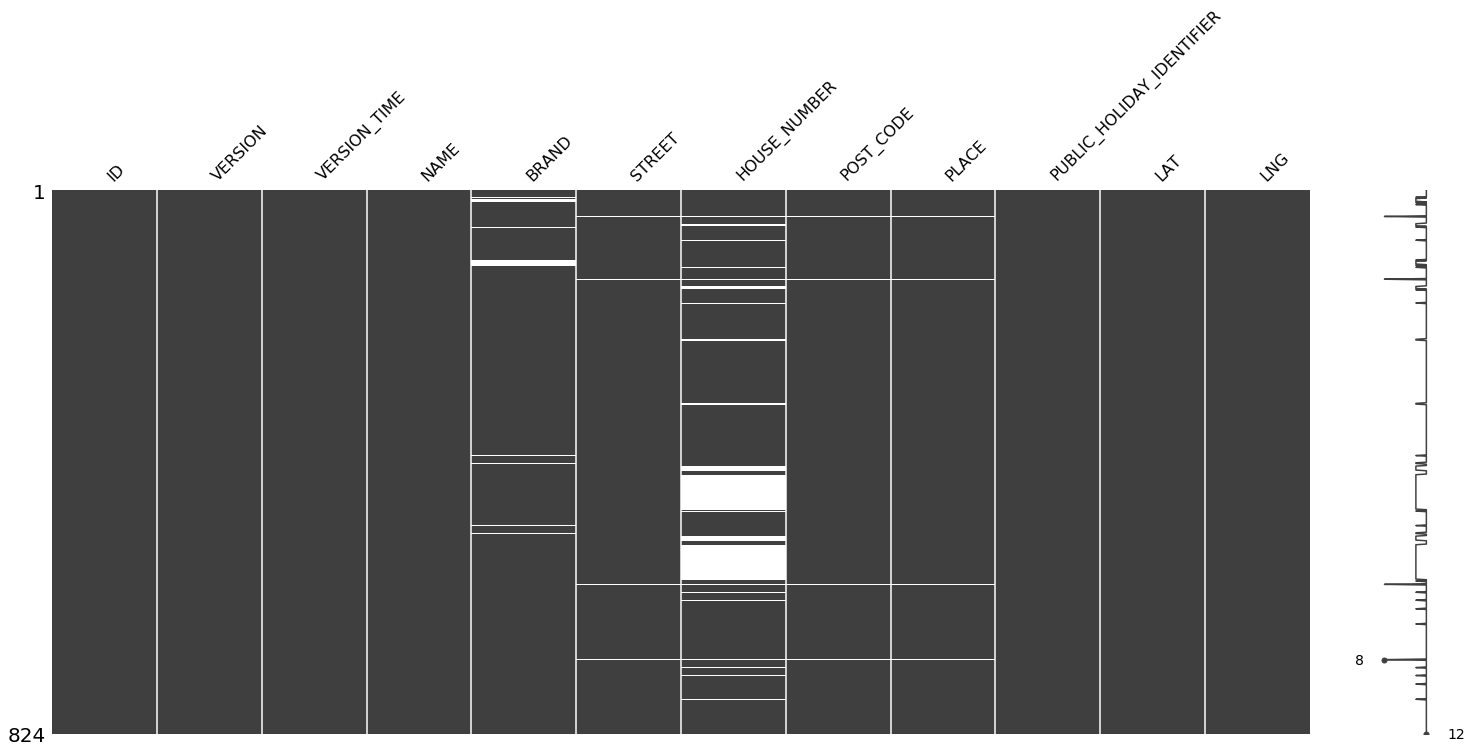

In [9]:
prices = pd.read_csv('example_sprit_cut_prices.csv', sep=';')
msno.matrix(prices)
#print(prices.head())

station = pd.read_csv('example_sprit_cut_station.csv', sep=';')
msno.matrix(station)
#print(station.head())
#station.info()

# Data Cleaning:

In [10]:
import numpy as np
#remove all unimportant columns from station dataframe  
to_drop = ['HOUSE_NUMBER','PUBLIC_HOLIDAY_IDENTIFIER']
station.drop(to_drop, inplace=True, axis=1)
station.drop_duplicates(keep=False)
station.fillna(0, inplace=True)
for col in station.columns:
    print(col)
    
#ms.matrix(station)
#station = station.replace('', np.nan, inplace=True)
station.fillna(value='UNKNOWN')

#removing non active brands
station = station[station['POST_CODE'] != 'nicht']
#station.loc[station['POST_CODE'] == 'nicht']
station.replace('\\N', 'UNKNOWN', inplace=True)
#station.replace(0, 'UNKNOWN', inplace=True)

station.loc[station['BRAND'] == 'UNKNOWN']
station['POST_CODE'] = station['POST_CODE'].replace('UNKNOWN', '0')
#print(station['POST_CODE'].unique())
station['VERSION_TIME']= pd.to_datetime(station['VERSION_TIME']) 
prices['DATE_CHANGED']= pd.to_datetime(prices['DATE_CHANGED']) 
station['LAT'] = station['LAT'].astype(float)
station['LNG'] = station['LNG'].astype(float)

ID
VERSION
VERSION_TIME
NAME
BRAND
STREET
POST_CODE
PLACE
LAT
LNG


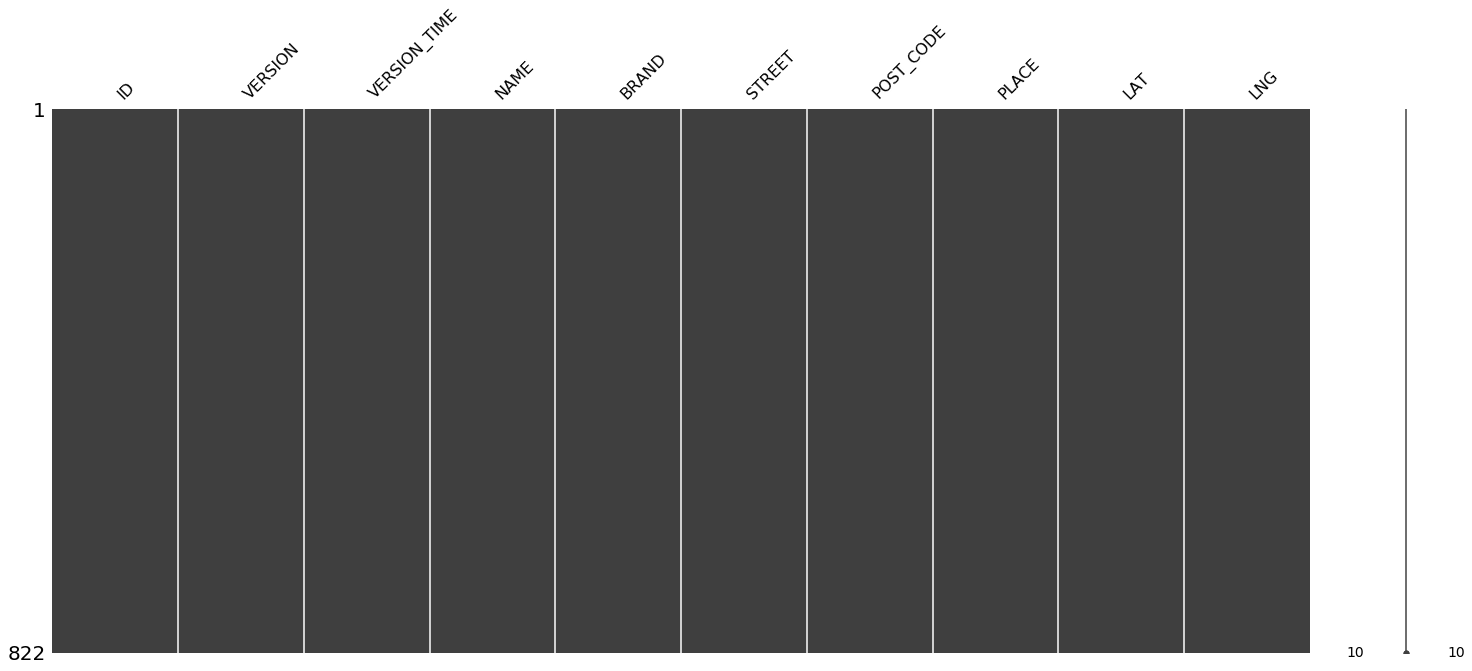

In [11]:
msno.matrix(station)

data is clean.

# 1.How many different stations exist in the dataset and what is the existing history.

In [12]:
#visualisation
import datetime

currentDT = datetime.datetime.now()
unique_station = station.groupby(['LAT', 'LNG']).size().reset_index(name='Freq')
print('No of unique stations are:%d'%(len(unique_station)))


station[['LAT', 'LNG','BRAND','NAME','VERSION_TIME']]
station['DAYS'] = currentDT -station['VERSION_TIME']
#station[['LAT', 'LNG','BRAND','NAME','VERSION_TIME','DAYS']]

No of unique stations are:409


In [13]:
def bar_chart(x,y,x_label,y_label):
    #output_file("bar_sorted.html")

    p = figure(x_range=x, plot_height=350,plot_width=1000, 
           toolbar_location=None, tools="")

    p.vbar(x=x, top=y, width=0.3)
    p.xgrid.grid_line_color = None
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.xaxis.major_label_orientation = 0.5
    p.y_range.start = 0

    show(p)

No of unique stations are:409

In [14]:
prices.head()
#unique_prices = prices.groupby(['STID']).size().reset_index(name='Freq').DATE_CHANGED.agg([min,max])
unique_prices =prices.groupby(['STID']).DATE_CHANGED.agg([min,max]).reset_index()
unique_prices['DAYS'] = unique_prices['max']-unique_prices['min']
unique_prices['DAYS']= unique_prices['DAYS'] / np.timedelta64(1, 'D')
#print(unique_prices.sort_values(by='DAYS',ascending =False))
#print(unique_prices[unique_prices['STID']=='00060062-0001-4444-8888-acdc00000001'])

In [15]:
from bokeh.io import show
from bokeh.plotting import figure

stid = unique_prices['STID']
counts = unique_prices['DAYS']
p = figure(x_range=stid, plot_height=500,plot_width=4000,
           toolbar_location=None, tools="")

p.vbar(x=stid, top=counts, width=0.1)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1
#p.x_range.range_padding = 2
p.xaxis.axis_label = "stid"
p.yaxis.axis_label = "days"
p.outline_line_color = 'black'
#p.y_range.range_padding =4


show(p)

In [41]:
#line chart

def line(x,y,x_label,y_label):
    
    p = figure(plot_width=1000, plot_height=400)

    
    # add a line renderer
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.line(x, y, line_width=2)

    show(p)

# 2.What is the min ,max for each gasoline type and station

In [25]:

weekly_prices = prices.copy()

weekly_prices['DATE_CHANGED_week'] = pd.to_datetime(weekly_prices['DATE_CHANGED']) - pd.to_timedelta(7, unit='d')


weekly_prices_e5 = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['E5'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_e5 = weekly_prices_e5[(weekly_prices_e5.amin != 0) & (weekly_prices_e5.amax != 0) ]
weekly_prices_e5 = weekly_prices_e5[(weekly_prices_e5.amin != -1) & (weekly_prices_e5.amax != -1) ]

print(weekly_prices_e5.head(10))

weekly_prices_e10 = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['E10'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_e10 = weekly_prices_e10[(weekly_prices_e10.amin != 0) & (weekly_prices_e10.amax != 0) ]
weekly_prices_e10 = weekly_prices_e10[(weekly_prices_e10.amin != -1) & (weekly_prices_e10.amax != -1) ]
#print(len(weekly_prices_e10))

weekly_prices_diesel = weekly_prices.groupby(['STID', pd.Grouper(key='DATE_CHANGED_week', freq='W-MON')])['DIESEL'].agg([pd.np.min, pd.np.max, pd.np.mean]).reset_index().sort_values('STID')
weekly_prices_diesel = weekly_prices_diesel[(weekly_prices_diesel.amin != 0) & (weekly_prices_diesel.amax != 0) ]
#print(weekly_prices_diesel.head(10))

line(weekly_prices_e5['DATE_CHANGED_week'],weekly_prices_e5['mean'],'weeks','mean prices')





                                   STID DATE_CHANGED_week  amin  amax  \
0  00060062-0001-4444-8888-acdc00000001        2014-06-02  1509  1509   
9  00060062-0001-4444-8888-acdc00000001        2014-08-04  1489  1569   
8  00060062-0001-4444-8888-acdc00000001        2014-07-28  1509  1579   
6  00060062-0001-4444-8888-acdc00000001        2014-07-14  1499  1569   
5  00060062-0001-4444-8888-acdc00000001        2014-07-07  1519  1589   
4  00060062-0001-4444-8888-acdc00000001        2014-06-30  1499  1599   
3  00060062-0001-4444-8888-acdc00000001        2014-06-23  1529  1599   
2  00060062-0001-4444-8888-acdc00000001        2014-06-16  1509  1579   
7  00060062-0001-4444-8888-acdc00000001        2014-07-21  1529  1569   
1  00060062-0001-4444-8888-acdc00000001        2014-06-09  1509  1569   

          mean  
0  1509.000000  
9  1524.045455  
8  1549.000000  
6  1539.000000  
5  1557.235294  
4  1548.333333  
3  1566.222222  
2  1555.153846  
7  1550.578947  
1  1543.705882  


In [26]:
diesel = weekly_prices_diesel.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')
#print(diesel.head(10))
e10 = weekly_prices_e10.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')
#print(e10.head(10))
e5 = weekly_prices_e5.groupby(['STID'])['mean'].agg([pd.np.mean]).reset_index().sort_values('mean')


#solution for question 7
x = pd.merge(diesel, e10, on='STID')
y = pd.merge(x, e5, on='STID')
y['average_price'] = y[['mean_x','mean_y','mean']].mean(axis=1)
y=y.sort_values(by ='average_price' , ascending=False)


# What is the cheapest station?

In [28]:

from bokeh.io import show, output_file
from bokeh.plotting import figure

output_file("bar_sorted.html")

fruits = y['STID']
counts = y['average_price']



p = figure(x_range=fruits, plot_height=350,plot_width=4000,
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=counts, width=0.1)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = 1
#p.x_range.range_padding = 2
p.xaxis.axis_label = "stid"
p.yaxis.axis_label = "average price for all types"
p.outline_line_color = 'black'
show(p)
print('Most priced gas station for all types is-')
print(y.loc[y['average_price'].idxmax()])

print('Most cheapest gas station for all types is-')
print(y.loc[y['average_price'].idxmin()])

Most priced gas station for all types is-
STID             23550389-c41c-43d1-9f34-a91270c59530
mean_x                                        1362.68
mean_y                                        1536.58
mean                                          1565.07
average_price                                 1488.11
Name: 399, dtype: object
Most cheapest gas station for all types is-
STID             eef314cf-a84a-4648-9284-c2df1efa36c9
mean_x                                        1147.33
mean_y                                        1319.12
mean                                          1351.04
average_price                                  1272.5
Name: 1, dtype: object


In [18]:
#plot boxplot

In [29]:
print('cheapest station per gasoline type')

e5_mean = weekly_prices_e5.groupby(['STID']).mean().reset_index()
#print(e5_mean)
print(e5_mean.loc[e5_mean['mean'].idxmin()])

e10_mean = weekly_prices_e10.groupby(['STID']).mean().reset_index()
print(e10_mean.loc[e10_mean['mean'].idxmin()])

e5_diesel = weekly_prices_diesel.groupby(['STID']).mean().reset_index()
print(e5_diesel.loc[e5_mean['mean'].idxmin()])


cheapest station per gasoline type
STID    eef314cf-a84a-4648-9284-c2df1efa36c9
amin                                 1340.67
amax                                 1363.33
mean                                 1351.04
Name: 377, dtype: object
STID    eef314cf-a84a-4648-9284-c2df1efa36c9
amin                                 1307.67
amax                                 1332.67
mean                                 1319.12
Name: 369, dtype: object
STID    eb9a6375-da22-4879-7f4e-9bdee32911e2
amin                                 1124.77
amax                                 1244.38
mean                                 1182.46
Name: 377, dtype: object


In [48]:
#4.at which day of a week is the price most 
#prices['day'] = prices.DATE_CHANGED.strftime("%A")
prices['day'] = prices['DATE_CHANGED'].map(
    lambda x: x.strftime("%A")
)
prices['month'] = prices['DATE_CHANGED'].map(
    lambda x: x.month
)
prices['year'] = prices['DATE_CHANGED'].map(
    lambda x: x.year
)
prices['HR'] = prices['DATE_CHANGED'].map(
    lambda x: x.hour
)


prices['average_price'] = prices[['E5','E10','DIESEL']].mean(axis=1)

min_price_by_day = prices[['average_price', 'day']].copy()
#print(min_price_by_day.head())
min_price_by_day_grouped = min_price_by_day.groupby(['day'])['average_price'].agg([pd.np.mean]).reset_index()
print('The day of the week cheapest price is:')
print(min_price_by_day_grouped.loc[min_price_by_day_grouped['mean'].idxmin()])
#bar chart to visualize

min_price_by_hr = prices[['average_price', 'HR']].copy()
#print(min_price_by_hr.head())
min_price_by_hr_grouped = min_price_by_hr.groupby(['HR'])['average_price'].agg([pd.np.mean]).reset_index()
print('The day of the hour cheapest price is:')
print(min_price_by_hr_grouped.loc[min_price_by_hr_grouped['mean'].idxmin()])

#line(min_price_by_hr_grouped['HR'],min_price_by_hr_grouped['mean'],'hour','average_price')
#bar chart to visualize



The day of the week cheapest price is:
day      Friday
mean    1359.76
Name: 0, dtype: object
The day of the hour cheapest price is:
HR        18.000000
mean    1307.151892
Name: 18, dtype: float64


# At which day of the week is the price most likely the cheapest

In [49]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

bar_chart(min_price_by_day_grouped['day'],min_price_by_day_grouped['mean'],"day","average_price")

# question 4:At which hour of the day is the price most likely the cheapest.

In [50]:

line(min_price_by_hr_grouped['HR'],min_price_by_hr_grouped['mean'],"hour","average_pice")

In [51]:
#5.at which hour of a day is the price most
#cheapest day
cheapest_e5_day = prices.groupby(['day']).mean().reset_index()
#print(cheapest_e5_day)

#cheapest hour
cheapest_e5_day = prices.groupby(['HR']).mean().reset_index()
#print(cheapest_e5_day)

# 6.How many different station locations

In [52]:
#6
from bokeh.plotting import show, output_file
import matplotlib.pylab as plt
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
def geo_data(lat,lng):
#     output_file("geojson.html")
    geo_source = GeoJSONDataSource(geojson=geojson)

    p = figure(background_fill_color="lightgrey")
    p.circle(x=lat, y=lng, size=15, alpha=0.7)

    show(p)
geo_data(station['LAT'],station['LNG'])

# 8.At which hour of the day do we have most price changes?

In [53]:
#7 at which hour during a day we have most price changes
hr_count =prices.groupby(['HR']).size().reset_index(name='counts')

line(hr_count['HR'],hr_count['counts'],"hour","changes")

# 9.Select 20 gas stations having the longest history.and visualise the average price per month

C:\Users\Niharika\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


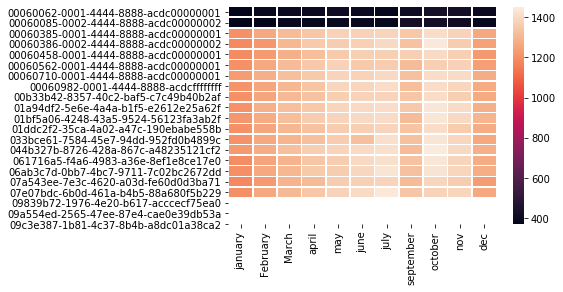

In [54]:
stations = unique_prices['STID'][:21]
#stations

price_by_month = prices[['STID','average_price', 'month','HR']].copy()
price_by_month_grouped =price_by_month[price_by_month['HR'].isin([12,13])]
price_by_month_grouped = price_by_month_grouped.groupby(['STID','month'])['average_price'].agg([pd.np.mean]).reset_index()

price_by_month_grouped =price_by_month_grouped[price_by_month_grouped['STID'].isin(stations)]

january = price_by_month_grouped[price_by_month_grouped['month']==1]
january.rename(columns={'mean': 'january'}, inplace=True)
january=january.drop(['month'], axis=1)

February= price_by_month_grouped[price_by_month_grouped['month']==2]
February.rename(columns={'mean': 'February'}, inplace=True)
February=February.drop(['month'], axis=1)

March= price_by_month_grouped[price_by_month_grouped['month']==3]
March.rename(columns={'mean': 'March'}, inplace=True)
March=March.drop(['month'], axis=1)

april= price_by_month_grouped[price_by_month_grouped['month']==4]
april.rename(columns={'mean': 'april'}, inplace=True)
april=april.drop(['month'], axis=1)

may= price_by_month_grouped[price_by_month_grouped['month']==5]
may.rename(columns={'mean': 'may'}, inplace=True)
may=may.drop(['month'], axis=1)

june= price_by_month_grouped[price_by_month_grouped['month']==6]
june.rename(columns={'mean': 'june'}, inplace=True)
june=june.drop(['month'], axis=1)

july= price_by_month_grouped[price_by_month_grouped['month']==7]
july.rename(columns={'mean': 'july'}, inplace=True)
july=july.drop(['month'], axis=1)

august= price_by_month_grouped[price_by_month_grouped['month']==8]
august.rename(columns={'mean': 'august'}, inplace=True)
august=august.drop(['month'], axis=1)

september= price_by_month_grouped[price_by_month_grouped['month']==9]
september.rename(columns={'mean': 'september'}, inplace=True)
september=september.drop(['month'], axis=1)

october= price_by_month_grouped[price_by_month_grouped['month']==10]
october.rename(columns={'mean': 'october'}, inplace=True)
october=october.drop(['month'], axis=1)

nov= price_by_month_grouped[price_by_month_grouped['month']==11]
nov.rename(columns={'mean': 'nov'}, inplace=True)
nov=nov.drop(['month'], axis=1)

dec= price_by_month_grouped[price_by_month_grouped['month']==12]
dec.rename(columns={'mean': 'dec'}, inplace=True)
dec=dec.drop(['month'], axis=1)

a =pd.merge(january, February, on='STID', how='inner')
b =pd.merge(a, March, on='STID', how='inner')
c =pd.merge(b, april, on='STID', how='inner')
d =pd.merge(c, may, on='STID', how='inner')
e =pd.merge(d, june, on='STID', how='inner')
f =pd.merge(e, july, on='STID', how='inner')
g =pd.merge(f, august, on='STID', how='inner')
g_ =pd.merge(f, september, on='STID', how='inner')
h =pd.merge(g_, october, on='STID', how='inner')
i =pd.merge(h, nov, on='STID', how='inner')
data =pd.merge(i, dec, on='STID', how='inner')
data=data.drop(['STID'], axis=1)
#bar_chart()
#create a dataframe
#print(data.head())
#from bokeh.plotting import HeatMap, show, output_file

# data = {
#   'stid': stations,
#   'month':  ['january','February','March','april','may','june','july','august','september','october'
#             ,'nov','dec'],
#   'score':   data,
# }

# hm10 = HeatMap(data, x=stations, y=month, values='score', stat=None,
#               sort_dim={'x': False}, width=1000)

# output_file("heatmap.html", title="heatmap.py example")

# show(vplot(hm10))

ax = sns.heatmap(data, linewidth=0.5,yticklabels=stations)
plt.show()

